## Forward-design 

In [1]:
import sys; sys.path.append('..')
import inflation, mesh, sheet_meshing
from tri_mesh_viewer import TriMeshViewer as Viewer
import triangulation
import numpy as np
import utils, py_newton_optimizer, benchmark

In [2]:
V, E = mesh.load_raw('data/ForwardDesign/hinge.obj')
fusedPts = list(np.loadtxt('data/ForwardDesign/fusehingev3.txt').reshape((-1, 2)))
holePts = []  # or load from file if you want, but it should be empty

In [3]:
m, iwv, iwbv = sheet_meshing.forward_design_mesh(V, E, fusedPts, holePts, np.prod(utils.bbox_dims(V)[0:2]) / 1e4)
isheet = inflation.InflatableSheet(m, iwv)

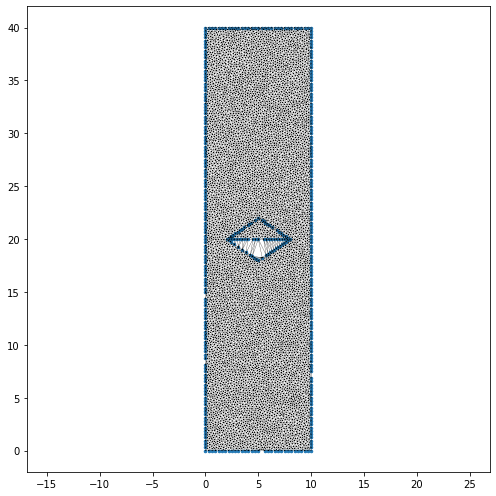

In [4]:
import visualization
visualization.plot_2d_mesh(m, pointList=np.where(iwv))


In [5]:
viewer = Viewer(isheet, wireframe=True)
viewer.show()

Renderer(camera=PerspectiveCamera(children=(PointLight(color='#999999', position=(0.0, 0.0, 5.0), quaternion=(…

InflatableSheet setVars	0.00279593	1
Newton iterations	84.0403	1
    InflatableSheet energy	0.00512099	1
    Newton iterate	84.0346	115
        Backtracking	0.600288	114
            InflatableSheet energy	0.103133	166
            InflatableSheet setVars	0.487688	166
        Compute descent direction	81.3659	114
            Negative curvature dir	0.223216	3
                negativeCurvatureDirection	0.215864	3
                    CHOLMOD Backsub	0.152521	51
                    CHOLMOD Numeric Factorize	0.00368881	3
                    CHOLMOD Symbolic Factorize	0.0309327	3
            newton_step	81.1419	114
                Newton solve	77.6491	194
                    CHOLMOD Numeric Factorize	75.1757	193
                    Solve	1.42808	115
                        CHOLMOD Backsub	1.08336	114
                        CHOLMOD Numeric Factorize	0.101833	1
                        CHOLMOD Symbolic Factorize	0.224278	1
                hessEval	3.33144	114
                largestMagnitudeEige

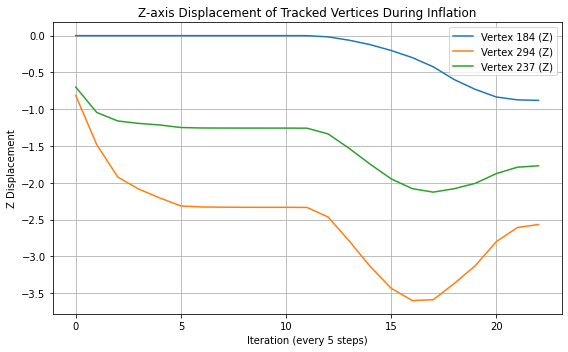

In [6]:
# ---- CONFIGURATION ----
import numpy as np
import matplotlib.pyplot as pltfrom mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for idx in tracked_indices:
    traj = np.array(trajectory[idx])
    if traj.shape[0] <= 1:
        continue
    ax.plot(traj[:, 0], traj[:, 1], traj[:, 2], label=f"Vertex {idx}")

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("3D Trajectory of Tracked Vertices During Inflation")
ax.legend()
plt.tight_layout()
plt.show()


# Define vertices you want to track, using approximate (x, y, z) rest positions
target_points = np.array([
    [5.0,  0.0, 0.0],
    [5.0, 20.0, 0.0],
    [5.0, 40.0, 0.0]
])

# Find closest actual mesh vertices to those target positions
from scipy.spatial import KDTree
V_rest = np.array([v.flatten() for v in isheet.restWallVertexPositions()])
tree = KDTree(V_rest)
tracked_indices = [tree.query(p)[1] for p in target_points]

# ---- TRACKING SETUP ----
trajectory = {idx: [] for idx in tracked_indices}
framerate = 5  # save every 5 iterations

def cb(it):
    if it % framerate == 0:
        for idx in tracked_indices:
            pos = isheet.getDeformedVtxPosition(idx, 0).flatten()
            trajectory[idx].append(pos)
        viewer.update()

# ---- RUN SIMULATION ----
import time
benchmark.reset()
isheet.setUseTensionFieldEnergy(True)
isheet.setUseHessianProjectedEnergy(False)

opts = py_newton_optimizer.NewtonOptimizerOptions()
opts.niter = 500
isheet.pressure = 1

cr = inflation.inflation_newton(isheet, isheet.rigidMotionPinVars, opts, callback=cb)
benchmark.report()

# ---- PLOT RESULTS ----
plt.figure(figsize=(8, 5))
for idx in tracked_indices:
    traj = np.array(trajectory[idx])
    if traj.shape[0] > 1:
        plt.plot(range(len(traj)), traj[:, 2], label=f"Vertex {idx} (Z)")

plt.xlabel("Iteration (every {} steps)".format(framerate))
plt.ylabel("Z Displacement")
plt.title("Z-axis Displacement of Tracked Vertices During Inflation")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


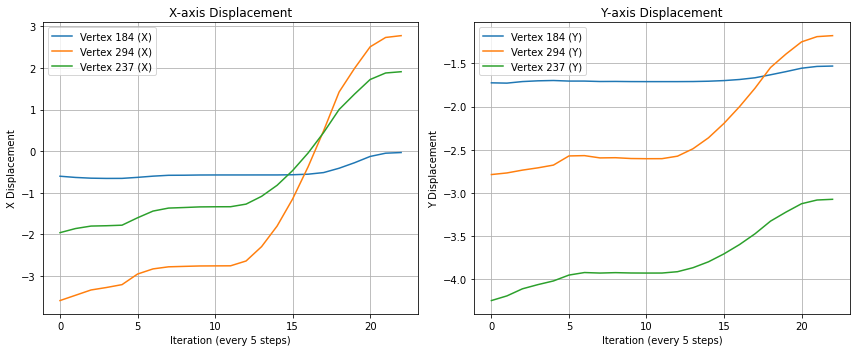

In [7]:
# Plot X and Y displacement
plt.figure(figsize=(12, 5))

# X Displacement
plt.subplot(1, 2, 1)
for idx in tracked_indices:
    traj = np.array(trajectory[idx])
    if traj.shape[0] <= 1:
        continue
    plt.plot(range(len(traj)), traj[:, 0], label=f"Vertex {idx} (X)")
plt.xlabel("Iteration (every {} steps)".format(framerate))
plt.ylabel("X Displacement")
plt.title("X-axis Displacement")
plt.grid(True)
plt.legend()

# Y Displacement
plt.subplot(1, 2, 2)
for idx in tracked_indices:
    traj = np.array(trajectory[idx])
    if traj.shape[0] <= 1:
        continue
    plt.plot(range(len(traj)), traj[:, 1], label=f"Vertex {idx} (Y)")
plt.xlabel("Iteration (every {} steps)".format(framerate))
plt.ylabel("Y Displacement")
plt.title("Y-axis Displacement")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


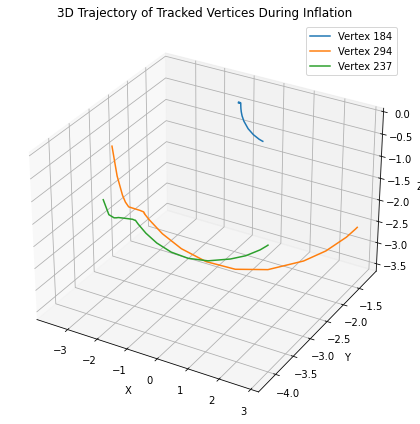

In [8]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for idx in tracked_indices:
    traj = np.array(trajectory[idx])
    if traj.shape[0] <= 1:
        continue
    ax.plot(traj[:, 0], traj[:, 1], traj[:, 2], label=f"Vertex {idx}")

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("3D Trajectory of Tracked Vertices During Inflation")
ax.legend()
plt.tight_layout()
plt.show()
